<a href="https://colab.research.google.com/github/Sourabhpatel1/Capstone-Project-EDA-AlmaBatter/blob/main/EDA_on_Telecom_Churn_Dataset(Capstone_Project_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b><u>AlmaBetter Capstone Project EDA on Telecom Churn Dataset</u></b></h1>
<h3> This notebook contains all the code for exploratory data analysis on the Telecom Churn Datatset for Capstone Project-1</h3>



*   The dataset pertains to the the Orange S.A. telecom operator.
*   The porpose of this EDA is to identigy the major factors contributing to the customer churn and suggest ways/recommendations to ensure customer retention.
* Python and Pandas library is used in this project to perfom exploratory analysis on the dataset provided.
* Matplotlib and Seaborn are the libraries used for plotting and visualizing the data.
* The objective of this notebook is to ascertain the proimary factors causing customer churn by using numerical and graphical analysis on the Orange S.A.'s dataset. 





In [1]:
# Importing all the neccessary libraries for EDA on the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Setting all the formatting and dispaly parameters for data visualization and plotting.

%matplotlib inline

# This is to change the plot size of the seaborn plots / change it to suit your screen size and resolution
sns.set(rc={'figure.figsize':(25,10)})

# This is to change the plot size of the matplotlib's plots / change it to suit your screen size and resolution

plt.rcParams["figure.figsize"] = (25, 10)

#define Seaborn color palette to use

colors = sns.color_palette('muted')

In [3]:
# Setting pd option for displaying floats instead of scientific notation in dataset

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# loading data

churn_data = pd.read_csv("/content/drive/MyDrive/Copy of Telecom Churn.csv")

In [6]:
# checking the head of the dataset

churn_data.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.10000,110,45.07000,197.40000,99,16.78000,244.70000,91,11.01000,10.00000,3,2.70000,1,False
1,OH,107,415,No,Yes,26,161.60000,123,27.47000,195.50000,103,16.62000,254.40000,103,11.45000,13.70000,3,3.70000,1,False
2,NJ,137,415,No,No,0,243.40000,114,41.38000,121.20000,110,10.30000,162.60000,104,7.32000,12.20000,5,3.29000,0,False
3,OH,84,408,Yes,No,0,299.40000,71,50.90000,61.90000,88,5.26000,196.90000,89,8.86000,6.60000,7,1.78000,2,False
4,OK,75,415,Yes,No,0,166.70000,113,28.34000,148.30000,122,12.61000,186.90000,121,8.41000,10.10000,3,2.73000,3,False


In [7]:
# checking for null values and categorical, boolean and numerical columns

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
# Using the describe function to get a birds eye view of the dataset.

churn_data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000,3333.00000
mean,101.06481,437.18242,8.09901,179.77510,100.43564,30.56231,200.98035,100.11431,17.08354,200.87204,100.10771,9.03932,10.23729,4.47945,2.76458,1.56286
std,39.82211,42.37129,13.68837,54.46739,20.06908,9.25943,50.71384,19.92263,4.31067,50.57385,19.56861,2.27587,2.79184,2.46121,0.75377,1.31549
min,1.00000,408.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,23.20000,33.00000,1.04000,0.00000,0.00000,0.00000,0.00000
25%,74.00000,408.00000,0.00000,143.70000,87.00000,24.43000,166.60000,87.00000,14.16000,167.00000,87.00000,7.52000,8.50000,3.00000,2.30000,1.00000
50%,101.00000,415.00000,0.00000,179.40000,101.00000,30.50000,201.40000,100.00000,17.12000,201.20000,100.00000,9.05000,10.30000,4.00000,2.78000,1.00000
75%,127.00000,510.00000,20.00000,216.40000,114.00000,36.79000,235.30000,114.00000,20.00000,235.30000,113.00000,10.59000,12.10000,6.00000,3.27000,2.00000
max,243.00000,510.00000,51.00000,350.80000,165.00000,59.64000,363.70000,170.00000,30.91000,395.00000,175.00000,17.77000,20.00000,20.00000,5.40000,9.00000


In [9]:
# getting a description of boolean and categorical columsn

churn_data.describe(include=["bool", "object"])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


<h1>A brief description of the dataset</h1>
<ol>
  <li>There are total 20 columns in the dataset.</li>
  <li>There are 8 float + 8 integer, a total of 16 numerical columns.</li>
  <li>There are 3 categorical columns Inetrnational Plan, Voice mail plan and State.</li>
  <li>There is only one boolean column, Churn which is True if a subscriber has stopped using the service of the operator.</li>
  <li>There are no null values in the dataset.</li>
  <li> The length of the dataset is 3333, i.e . there are 3333 rows in the dataset.</li>
  <li>Area code, although a numerical column in the dataset, is a column or feature of a categoricl nature and therefore would be treated as such thorughout the EDA.</li>
  <li>Median and Mean of calls and charges in all three time divisions i.e. Day, Evening and Night is around 100 calls per subscriber suggesting that one time division is not preffered over the other by the subscribers.</li>
  <li>Also for International calls and charge the mean and median are near identical meaning that the data is uniformly distributed.</li>
  <li>The most number of subscribers are from "WV" state.</li>
</ol>

In [37]:
#finding out the churn rate

percent_churn = (churn_data["Churn"].value_counts()[True]/len(churn_data))*100

print(f"The rate of churn for the dataset period is {round(percent_churn,2)}%");

The rate of churn for the dataset period is 14.49%


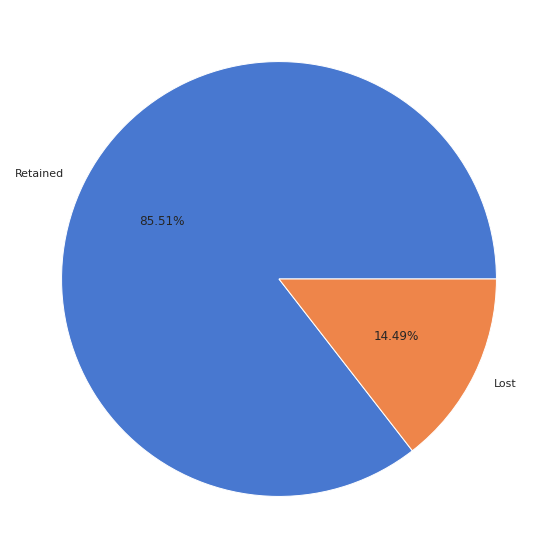

In [42]:
# Plotting Churn rate
# plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
churn_group = churn_data.groupby("Churn")

plt.pie(churn_group["Churn"].count(), labels=["Retained", "Lost"], colors=colors, autopct='%.2f%%');



1.   As we can see from the groupby fucntion and the chart that the telecom operator has lost nearly 14.50% of it's subscribers during the period.
2.   Churn rate of 14.50% is considered high in the industry as it nearly costs 7 times as much to acquire a new customer when compared to retaining an existing one.  

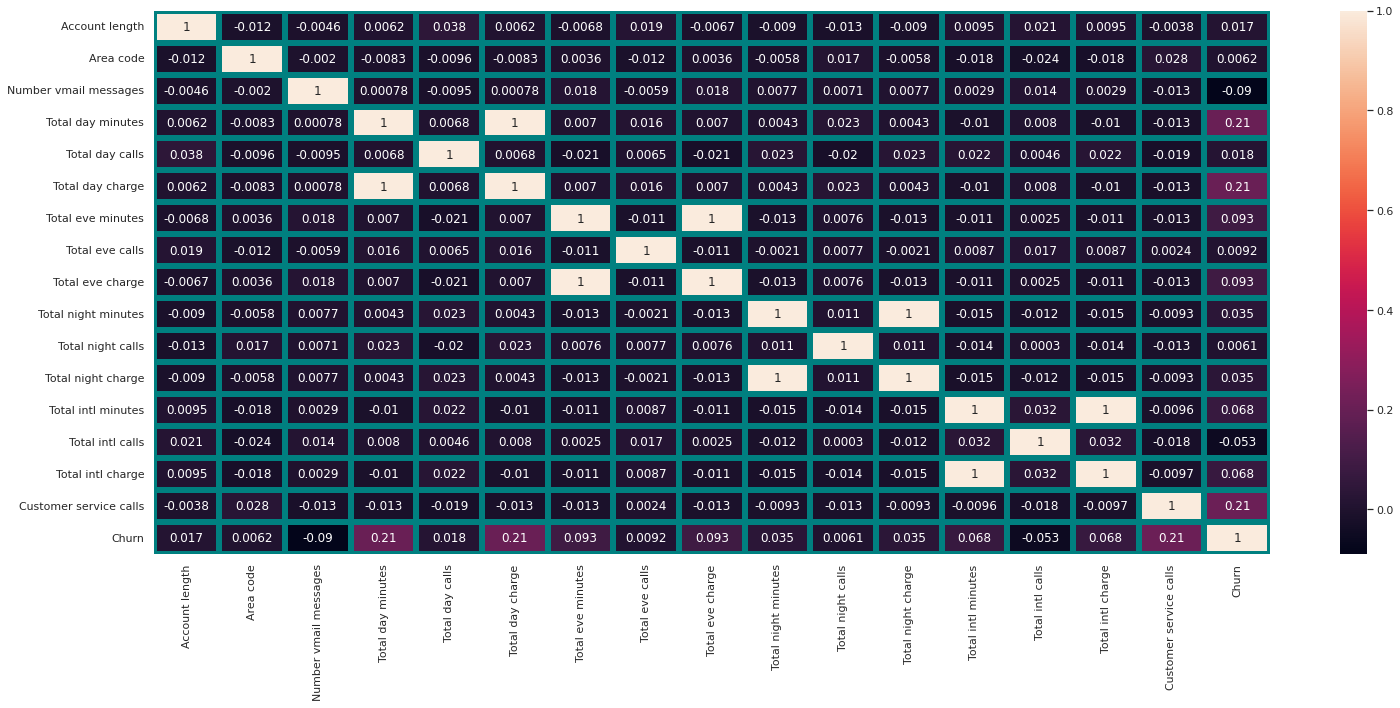

In [68]:
# getting categorical columns

cat_cols = [col for col in churn_data.columns if churn_data[col].dtype == "O"]

# getting numerical columns
num_cols = [col for col in churn_data.columns if col not in cat_cols]

# as area code is categorical we will add it to the categorical columns. 

cat_cols.append("Area code")

num_cols, cat_cols

# Checking the correlation between the datacolums to identify the primary features contributing most to the churn.

sns.heatmap(churn_data.corr(), annot=True, linewidths=5, linecolor="teal");
